In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras

In [3]:
import glob

In [4]:
train_files=glob.glob("C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train/*/**")

In [5]:
len(train_files)

5216

In [6]:
train_files

['C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0115-0001.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0117-0001.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0119-0001.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0122-0001.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0125-0001.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0127-0001.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0128-0001.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0129-0001.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0131-0001.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0133-0001.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0135-

In [7]:
train_files[0]

'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0115-0001.jpeg'

In [8]:
train_files[4000]

'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\PNEUMONIA\\person488_virus_992.jpeg'

In [9]:
train_files[3000]

'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\PNEUMONIA\\person23_bacteria_91.jpeg'

In [10]:
from random import shuffle
shuffle(train_files)
train_files

['C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0261-0001.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\PNEUMONIA\\person534_virus_1061.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\PNEUMONIA\\person1818_bacteria_4676.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\NORMAL2-IM-1348-0001.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\PNEUMONIA\\person1079_virus_1789.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\PNEUMONIA\\person698_virus_1294.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\PNEUMONIA\\person294_bacteria_1383.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\PNEUMONIA\\person564_bacteria_2343.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\PNEUMONIA\\person374_virus_757.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\NORMA

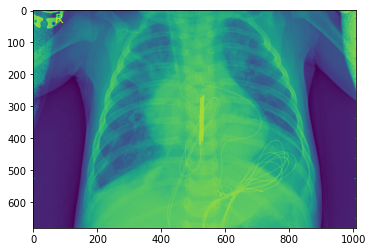

In [15]:
from PIL import Image
img=Image.open(train_files[1000])
plt.imshow(img)

In [16]:
np.array(img).shape

(680, 1008)

In [19]:
img=img.resize((128,128))

In [20]:
np.array(img).shape

(128, 128)

In [17]:
grey_files=[]

In [18]:
for item in train_files:
    img=Image.open(item).convert('L')
    img.save('greyscale.jpeg')
    grey_files.append(img)

In [22]:
np.array(grey_files[0]).shape

(1330, 1596)

In [24]:
len(grey_files)

5216

In [23]:
modified_files=[]

In [25]:
for item in grey_files:
    img=item.resize((128,128))
    modified_files.append(img)

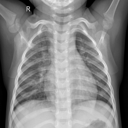

In [26]:
modified_files[0]

In [27]:
np.array(modified_files[0]).shape

(128, 128)

In [28]:
len(modified_files)

5216

In [29]:
X_train=np.zeros((len(modified_files),128,128))
for i,fi in enumerate(modified_files):
    fi_array=np.array(fi)
    if(fi_array.shape[0]==128 and fi_array.shape[1]==128):
        X_train[i,:,:]=fi_array

In [30]:
X_train[0]

array([[68., 65., 64., ..., 76., 73., 69.],
       [72., 70., 70., ..., 74., 71., 67.],
       [74., 74., 73., ..., 73., 68., 64.],
       ...,
       [ 1.,  0.,  0., ...,  0.,  1.,  2.],
       [ 1.,  0.,  0., ...,  0.,  2.,  3.],
       [ 1.,  0.,  0., ...,  0.,  2.,  3.]])

In [31]:
X_train/255.0

array([[[0.26666667, 0.25490196, 0.25098039, ..., 0.29803922,
         0.28627451, 0.27058824],
        [0.28235294, 0.2745098 , 0.2745098 , ..., 0.29019608,
         0.27843137, 0.2627451 ],
        [0.29019608, 0.29019608, 0.28627451, ..., 0.28627451,
         0.26666667, 0.25098039],
        ...,
        [0.00392157, 0.        , 0.        , ..., 0.        ,
         0.00392157, 0.00784314],
        [0.00392157, 0.        , 0.        , ..., 0.        ,
         0.00784314, 0.01176471],
        [0.00392157, 0.        , 0.        , ..., 0.        ,
         0.00784314, 0.01176471]],

       [[0.00784314, 0.01568627, 0.01176471, ..., 0.00784314,
         0.        , 0.        ],
        [0.00784314, 0.01568627, 0.01176471, ..., 0.00784314,
         0.        , 0.        ],
        [0.00392157, 0.01176471, 0.01568627, ..., 0.00392157,
         0.        , 0.        ],
        ...,
        [0.05490196, 0.10196078, 0.18039216, ..., 0.        ,
         0.        , 0.        ],
        [0.0

In [38]:
Y_train=np.zeros((len(train_files)))
for i,fi in enumerate(train_files):
    p=fi.find("NORMAL")
    q=fi.find("virus")
    r=fi.find("bacteria")
    if p!=-1:
        Y_train[i]=1.0
    elif q!=-1:
        Y_train[i]=2.0
    elif r!=-1:
        Y_train[i]=3.0

In [46]:
Y_train

array([1., 2., 3., ..., 3., 2., 1.])

In [40]:
len(Y_train)

5216

In [47]:
from tensorflow.keras.models import Sequential

In [48]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [51]:
from tensorflow.keras.layers import BatchNormalization

In [53]:
from keras.layers import Dropout

In [54]:
model=Sequential()
model.add(Conv2D(32,(3,3),strides=2,padding='Same',activation='relu',input_shape=(128,128,1)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),strides=1,padding='Same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),strides=1,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),strides=1,padding='Same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(3,activation="softmax"))

In [55]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate= 1e-3),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)      

In [57]:
X_train.shape

(5216, 128, 128)

In [58]:
X_train=X_train.reshape(len(X_train),128,128,1)

In [63]:
Y_train=Y_train-1


In [64]:
model.fit(X_train, Y_train,epochs=3,validation_split=0.1)

Epoch 1/3
147/147 [==============================] - 80s 509ms/step - loss: 1.1102 - accuracy: 0.7049 - val_loss: 0.6048 - val_accuracy: 0.7088
Epoch 2/3
147/147 [==============================] - 48s 324ms/step - loss: 0.5454 - accuracy: 0.7627 - val_loss: 0.6022 - val_accuracy: 0.7088
Epoch 3/3
147/147 [==============================] - 46s 315ms/step - loss: 0.5187 - accuracy: 0.7778 - val_loss: 0.5169 - val_accuracy: 0.7663
